In [1]:
%%HTML
<style>
h1 {
    --background: #F004;
    --foreground: red;
    background-color: var(--background);
    border: 2px solid var(--foreground);
    color: var(--foreground);
    border-radius: 10px;
    padding: 20px;
}
h2 {
    --background: #20BEFFBB;
    --foreground: blue;
    background-color: var(--background);
    border: 2px solid var(--foreground);
    padding: 20px;
    border-radius: 10px;
    color: var(--foreground);
}
h3 {
    --background: #FFCE8499;
    --foreground: #F07108;
    background-color: var(--background);
    border: 2px solid var(--foreground);
    padding: 10px;
    border-radius: 10px;
    color: var(--foreground);
    width: 50%;
}
</style> 

## Importing Libraries

In [2]:
# --- --- --- TORCH --- --- --- --- --- --- --- --- ---
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch import optim
from torch.autograd import Variable

# --- --- --- TORCH-VISION --- --- --- --- --- --- ---
from torchvision.transforms import transforms
from torchvision.models.vgg import vgg16,vgg19
from torchvision.models.mobilenet import MobileNetV2
from torchvision.models.resnet import resnet50
import torchvision.utils as utils

# --- --- DATA PRE-PROCESSING AND VISUALIZATION --- ---
from tqdm import tqdm
import pandas as pd
import numpy as np
from PIL import Image
import PIL
from matplotlib import pyplot as plt
import cv2

# --- --- PYTHON UTILITY LIBRARIES --- --- --- --- ---
from math import exp
import math
import warnings
from os.path import join
import os
from os import listdir
import gc
import shutil
from zipfile import ZipFile
warnings.filterwarnings("ignore")

### Constants

In [3]:
# TO SUPPORT GPU
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
# HYPER PARAMATERS
# BASE = 2
# ORDER = 3
# UPSCALE_FACTOR = BASE ** ORDER
# CROP_SIZE = UPSCALE_FACTOR * 11

True


### Directory Structure

In [4]:
!mkdir epochs

## Data Set Splitting (Day & Night)

In [5]:
day_1 = ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png', '101.png', '102.png']
day_2 = ['1026000.png', '1026001.png', '1026002.png', '1026003.png', '1026004.png', '1026005.png', '1026006.png', '1026007.png', '1026008.png', '1026009.png', '10260010.png', '10260011.png', '10260012.png', '10260013.png', '10260014.png', '10260015.png', '10260016.png', '10260017.png', '10260018.png', '10260019.png', '10260020.png', '10260021.png', '10260022.png', '10260023.png', '10260024.png', '10260025.png', '10260026.png', '10260027.png', '10260028.png', '10260029.png', '10260030.png', '10260031.png', '10260032.png', '10260033.png', '10260034.png', '10260035.png', '10260036.png', '10260037.png', '10260038.png', '10260039.png', '10260040.png', '10260041.png', '10260042.png', '10260043.png', '10260044.png', '10260045.png', '10260046.png', '10260047.png', '10260048.png', '10260049.png', '10260050.png', '10260051.png', '10260052.png', '10260053.png', '10260054.png', '10260055.png', '10260056.png', '10260057.png', '10260058.png', '10260059.png', '10260060.png', '10260061.png', '10260062.png', '10260063.png', '10260064.png', '10260065.png', '10260066.png', '10260067.png', '10260068.png', '10260069.png', '10260070.png', '10260071.png', '10260072.png', '10260073.png', '10260074.png', '10260075.png', '10260076.png', '10260077.png', '10260078.png', '10260079.png', '10260080.png', '10260081.png', '10260082.png', '10260083.png', '10260084.png', '10260085.png', '10260086.png', '10260087.png', '10260088.png', '10260089.png', '10260090.png', '10260091.png', '10260092.png', '10260093.png', '10260094.png', '10260095.png', '10260096.png', '10260097.png', '10260098.png', '10260099.png', '102600100.png', '102600101.png', '102600102.png', '102600103.png', '102600104.png', '102600105.png', '102600106.png', '102600107.png', '102600108.png', '102600109.png', '102600110.png', '102600111.png', '102600112.png', '102600113.png', '102600114.png', '102600115.png', '102600116.png', '102600117.png', '102600118.png', '102600119.png', '102600120.png', '102600121.png', '102600122.png', '102600123.png', '102600124.png', '102600125.png', '102600126.png', '102600127.png', '102600128.png', '102600129.png', '102600130.png', '102600131.png', '102600132.png', '102600133.png', '102600134.png', '102600135.png', '102600136.png', '102600137.png', '102600138.png', '102600139.png', '102600140.png', '102600141.png', '102600142.png', '102600143.png', '102600144.png', '102600145.png', '102600146.png', '102600147.png', '102600148.png', '102600149.png', '102600150.png', '102600151.png', '102600152.png', '102600153.png', '102600154.png', '102600155.png', '102600156.png', '102600157.png', '102600158.png', '102600159.png', '102600160.png', '102600161.png', '102600162.png', '102600163.png', '102600164.png', '102600165.png', '102600166.png', '102600167.png', '102600168.png', '102600169.png', '102600170.png', '102600171.png', '102600172.png', '102600173.png', '102600174.png', '102600175.png', '102600176.png', '102600177.png', '102600178.png', '102600179.png', '102600180.png', '102600181.png', '102600182.png', '102600183.png', '102600184.png', '102600185.png', '102600186.png', '102600187.png', '102600188.png', '102600189.png', '102600190.png', '102600191.png', '102600192.png', '102600193.png', '102600194.png', '102600195.png', '102600196.png', '102600197.png', '102600198.png', '102600199.png', '102600200.png', '102600201.png', '102600202.png', '102600203.png', '102600204.png', '102600205.png', '102600206.png', '102600207.png', '102600208.png', '102600209.png', '102600210.png', '102600211.png', '102600212.png', '102600213.png', '102600214.png', '102600215.png', '102600216.png', '102600217.png', '102600218.png', '102600219.png', '102600220.png', '102600221.png', '102600222.png', '102600223.png', '102600224.png', '102600225.png', '102600226.png', '102600227.png', '102600228.png', '102600229.png', '102600230.png', '102600231.png', '102600232.png', '102600233.png', '102600234.png', '102600235.png', '102600236.png', '102600237.png', '102600238.png', '102600239.png', '102600240.png', '102600241.png', '102600242.png', '102600243.png', '102600244.png', '102600245.png', '102600246.png', '102600247.png', '102600248.png', '102600249.png', '102600250.png', '102600251.png', '102600252.png', '102600253.png', '102600254.png', '102600255.png', '102600256.png', '102600257.png', '102600258.png', '102600259.png', '102600260.png', '102600261.png', '102600262.png', '102600263.png', '102600264.png', '102600265.png', '102600266.png', '102600267.png', '102600268.png', '102600269.png', '102600270.png', '102600271.png', '102600272.png', '102600273.png', '102600274.png', '102600275.png']
night_1 = ['1020.png', '1021.png', '1022.png', '1023.png', '1024.png', '1025.png', '1026.png', '1027.png', '1028.png', '1029.png', '10210.png', '10211.png', '10212.png', '10213.png', '10214.png', '10215.png', '10216.png', '10217.png', '10218.png', '10219.png', '10220.png', '10221.png', '10222.png', '10223.png', '10224.png', '10225.png', '10226.png', '10227.png', '10228.png', '102557.png', '102558.png', '102559.png', '102560.png', '102561.png', '102562.png', '102563.png', '102564.png', '102565.png', '102566.png', '102567.png', '102568.png', '102569.png', '102570.png', '102571.png', '102572.png', '102573.png', '102574.png', '102575.png', '102576.png', '102577.png', '102578.png', '102579.png', '102580.png', '102581.png', '102582.png', '102583.png', '102584.png', '102585.png', '102586.png', '102587.png', '102588.png', '102589.png', '102590.png', '102591.png', '102592.png', '102593.png', '102594.png', '102595.png', '102596.png', '102597.png', '102598.png', '102599.png', '102600.png']

## Utility Functions

### Data Preprocessing

In [6]:
def is_valid_image(file_name):
    return any(file_name.endswith(ext) for ext in ['.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG'])

def calc_valid_crop_size(crop_size, upscale_factor):
    return crop_size - (crop_size % upscale_factor)

def high_res_transform(crop_size):
    return transforms.Compose([transforms.RandomCrop(crop_size), transforms.ToTensor()])

def low_res_transform(crop_size, upscale_factor):
    return transforms.Compose([transforms.ToPILImage(), transforms.Resize(crop_size//upscale_factor, interpolation = Image.BICUBIC), transforms.ToTensor()])

### Structural Similarity Index Metrix

In [7]:
# POST TRAINING METRICS : SSIM
def _gaussian(window_size, sigma):
    g = torch.Tensor([exp(-(x - window_size // 2) ** 2 / float(2 * sigma ** 2)) for x in range(window_size)])
    return g / g.sum()

def _create_window(window_size, channel):
    dim1_window = _gaussian(window_size, 1.5).unsqueeze(1)
    dim2_window = dim1_window.mm(dim1_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = Variable(dim2_window.expand(channel, 1, window_size, window_size).contiguous())
    return window

def _structural_similarity_index_measure(img1, img2, window, window_size, channel, size_average=True):
    mu1 = F.conv2d(img1, window, padding=window_size // 2, groups=channel)
    mu2 = F.conv2d(img2, window, padding=window_size // 2, groups=channel)
    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1 * mu2
    sigma1_sq = F.conv2d(img1 * img1, window, padding=window_size // 2, groups=channel) - mu1_sq
    sigma2_sq = F.conv2d(img2 * img2, window, padding=window_size // 2, groups=channel) - mu2_sq
    sigma12 = F.conv2d(img1 * img2, window, padding=window_size // 2, groups=channel) - mu1_mu2

    C1 = 0.01 ** 2
    C2 = 0.03 ** 2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))

    if size_average:
        return ssim_map.mean()
    else:
        return ssim_map.mean(1).mean(1).mean(1)

def ssim(img1, img2, window_size=11, size_average=True):
    (_, channel, _, _) = img1.size()
    window = _create_window(window_size, channel)
    if img1.is_cuda:
        window = window.cuda(img1.get_device())
    window = window.type_as(img1)
    return _structural_similarity_index_measure(img1, img2, window, window_size, channel, size_average)

## Data Loaders

### Train and Validation Data Loaders

In [8]:
class ImageDataFromFolder(Dataset):
    def __init__(self,file_names, crop_size, upscale_factor):
        super().__init__()
        self.image_file_names = file_names
        self.upscale_factor = upscale_factor
        self.crop_size = calc_valid_crop_size(crop_size, upscale_factor)
        self.high_res_transform = high_res_transform(self.crop_size)
        self.low_res_transform = low_res_transform(crop_size,upscale_factor)

    def __getitem__(self,index):
        hr_image = self.high_res_transform(Image.open(self.image_file_names[index]))
        lr_image = self.low_res_transform(hr_image)
        return lr_image, hr_image

    def __len__(self):
        return len(self.image_file_names)

In [9]:
def get_train_valid_data_loaders(data_dir_path=None, train_frac=0.8, file_names=[], ds_scale_factor=None, upscale_factor=None):
    if len(file_names) == 0:
        file_names = [join(data_dir,x) for x in listdir(data_dir) if is_valid_image(x)]
    assert train_frac < 1
    # DATASETS
    train_set = ImageDataFromFolder(file_names= file_names[:int(len(file_names) * train_frac)] * ds_scale_factor, crop_size=CROP_SIZE, upscale_factor=upscale_factor)
    val_set = ImageDataFromFolder(file_names= file_names[int(len(file_names) * train_frac):] * ds_scale_factor, crop_size=CROP_SIZE, upscale_factor=upscale_factor)
    # DATA LOADERS
    train_loader = DataLoader(dataset=train_set, num_workers=4, batch_size=16, shuffle=True)
    val_loader = DataLoader(dataset=val_set, num_workers=4, batch_size=8, shuffle=False)
    return train_loader, val_loader

## Experimentation

In [10]:
real_img = Image.open("/kaggle/input/objectdetectiondatasetcar/car/0.png")

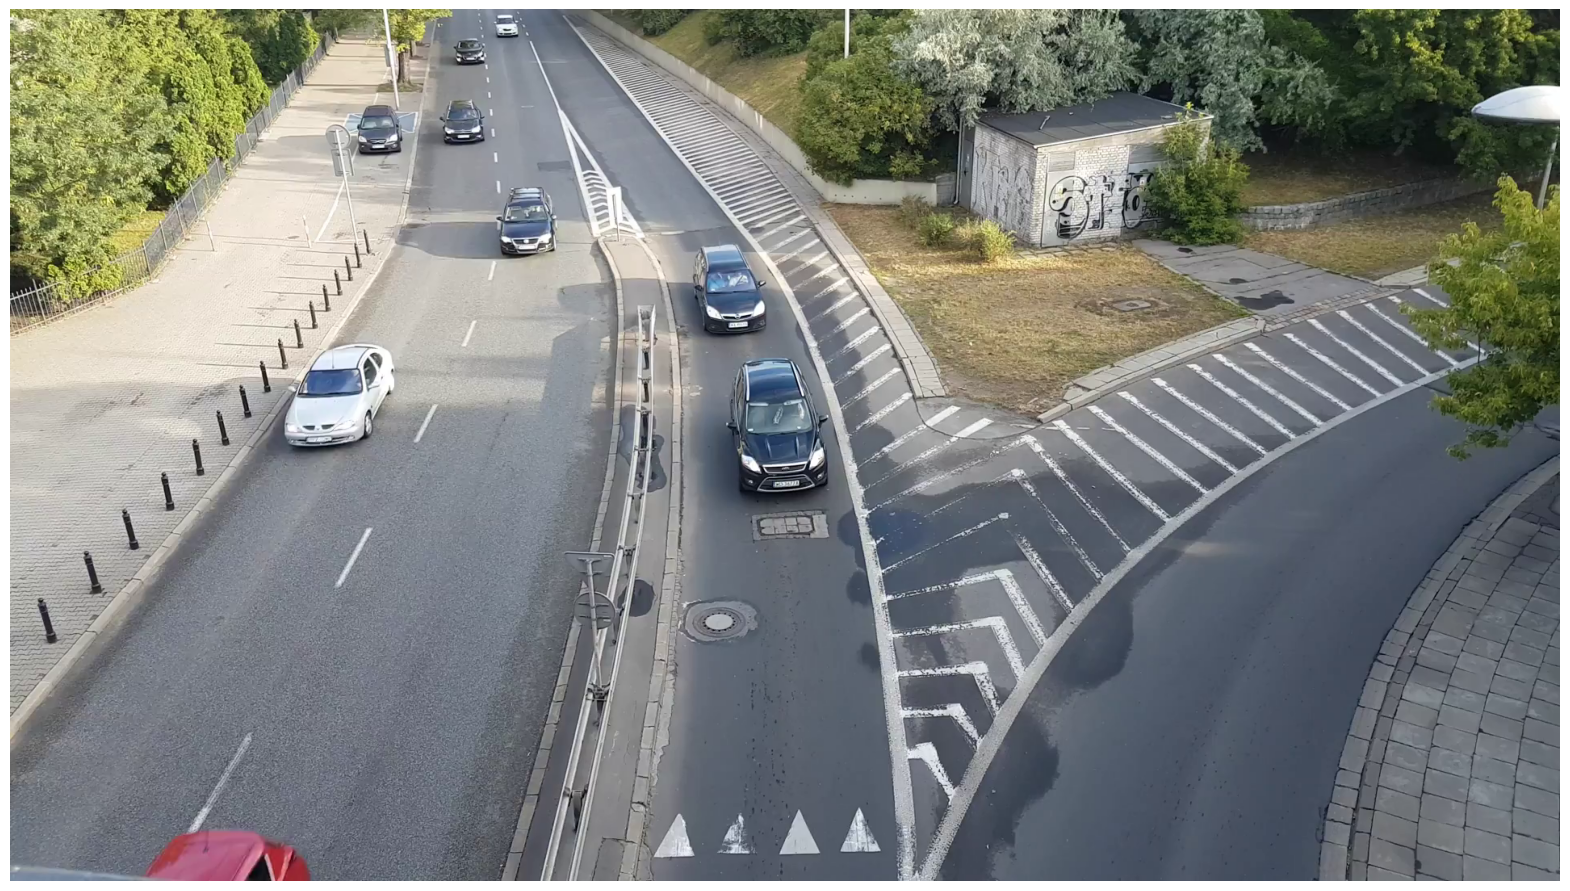

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(real_img)
plt.axis(False)
plt.show()

(-0.5, 21.5, 21.5, -0.5)

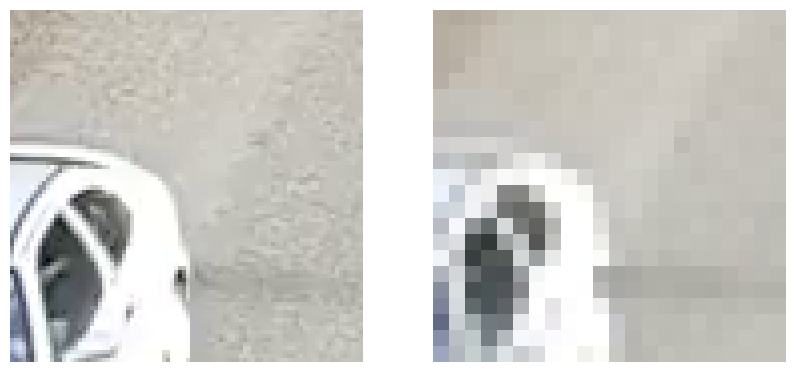

In [12]:
BASE = 2
ORDER = 3
TEMP_UPSCALE_FACTOR = BASE ** ORDER
TEMP_CROP_SIZE = TEMP_UPSCALE_FACTOR * 11
valid_crop_size = calc_valid_crop_size(TEMP_CROP_SIZE, TEMP_UPSCALE_FACTOR)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
hr_img = high_res_transform(valid_crop_size)(real_img)
axes[0].imshow(hr_img.permute(1, 2, 0))
axes[0].axis(False)
lr_img = low_res_transform(valid_crop_size,4)(hr_img)
axes[1].imshow(lr_img.permute(1, 2, 0))
axes[1].axis(False)

In [13]:
print(hr_img.size())
print(lr_img.size())

torch.Size([3, 88, 88])
torch.Size([3, 22, 22])


## Neural Networks Blocks

__Building SRGAN Model Architecture as a Base Model__

![SRGAN](https://raw.githubusercontent.com/tensorlayer/srgan/master/img/model.jpeg)

### 1. Residual Block

In [14]:
# RESIDUAL BLOCK
"""CONSISTING OF :
1. CONVOLUTIONAL LAYER (Kernels=64, Strid=1)
2. BATCH NORMALIZATION 
3. ReLU
4. CONVOLUTIONAL LAYER (Kernels=64, Strid=1)
5. BATCH NORMALIZATION 
6. ELEMENT WISE SUM
"""
# class ResidualBlock(nn.Module):
    
#     def __init__(self, channels):
#         super(ResidualBlock, self).__init__()
#         self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, padding=1) # LEARNABLE PARAMETERS
#         self.bn1 = nn.BatchNorm2d(channels)                                  # REGULARIZATION (BATCH NORMALIZATIOn)
#         self.prelu = nn.PReLU()                                              # ACTIVATION FUNCTION
#         self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, padding=1) # LEARNABLE PARAMETERS
#         self.bn2 = nn.BatchNorm2d(channels)                                  # REGULARIZATION (BATCH NORMALIZATIOn)
        
#     def forward(self, x):
#         x_temp = self.conv1(x)
#         x_temp = self.bn1(x_temp)
#         x_temp = self.prelu(x_temp)
#         x_temp = self.conv2(x_temp)
#         x_temp = self.bn2(x_temp)
#         return x + x_temp
    
class ResidualBlock(nn.Module):
    
    def __init__(self, channels ):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.prelu1 = nn.PReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.prelu2 = nn.PReLU()
        self.conv3 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.prelu3 = nn.PReLU()
        self.conv4 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.prelu4 = nn.PReLU()
        self.conv5 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        
    def forward(self, x):
        x_temp_1 = self.conv1(x)
        x_temp_1 = self.prelu1(x_temp_1)
        
        x_temp_2 = self.conv2(x + x_temp_1)
        x_temp_2 = self.prelu2(x_temp_2)
        
        x_temp_3 = self.conv3(x + x_temp_1 + x_temp_2)
        x_temp_3 = self.prelu3(x_temp_3)
        
        x_temp_4 = self.conv4(x + x_temp_1 + x_temp_2 + x_temp_3)
        x_temp_4 = self.prelu4(x_temp_4)
        
        x_temp_5 = self.conv5(x + x_temp_1 + x_temp_2 + x_temp_3 + x_temp_4)
        
        return x + x_temp_5

### 2. Up Sampling Block

In [15]:
class UpsampleBlock(nn.Module):
    
    def __init__(self, channels, up_scale_factor):
        super(UpsampleBlock, self).__init__()
        self.conv = nn.Conv2d(channels, channels * up_scale_factor ** 2, kernel_size=3, padding=1) # LEARNABLE PARAMETERS
        self.pixel_shuffle = nn.PixelShuffle(up_scale_factor)                                      # SHUFFLER
        self.prelu = nn.PReLU()                                                                    # ACTIVATION FUNCTION
        
    def forward(self, x):
        x = self.conv(x)
        x = self.pixel_shuffle(x)
        x = self.prelu(x)
        return x

## Generator

In [36]:
class Generator(nn.Module):
    
    def __init__(self, scale_factor):
        super(Generator, self).__init__()
        num_upsample_block = int(math.log(scale_factor, 2))

        self.b1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=9, padding=4),nn.PReLU())
        self.b2 = ResidualBlock(64)
        self.b3 = ResidualBlock(64)
        self.b4 = ResidualBlock(64)
        self.b5 = ResidualBlock(64)
        self.b6 = ResidualBlock(64)
        self.b7 = ResidualBlock(64)
        self.b8 = ResidualBlock(64)
        self.b9 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64)
        )
        temp_b10 = [UpsampleBlock(64, 2) for i in range(num_upsample_block)] + [nn.Conv2d(64, 3, kernel_size=9, padding=4)]
        self.b10 = nn.Sequential(*temp_b10)
        
    def forward(self, x):
        x1 = self.b1(x)
        x2 = self.b2(x1)
        x3 = self.b3(x2)
        x4 = self.b4(x3)
        x5 = self.b5(x4)
        x6 = self.b6(x5)
        x7 = self.b7(x6)
        x8 = self.b8(x7)
        x9 = self.b9(x8)
        x10 = self.b10(x1 + x9)
        return (torch.tanh(x10) + 1) / 2


## Discriminator

In [17]:
class Discriminator(nn.Module):
    __doc__ = """SIMPLE BINARY IMAGE CLASSIFICATION MODEL"""
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),              # LAYER 1
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),   # LAYER 2
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),            # LAYER 3
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),           # LAYER 4
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1), # LAYER 5
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),           # LAYER 6
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),

            nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1), # LAYER 7
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),
            nn.AdaptiveAvgPool2d(1),
            
            nn.Conv2d(512, 1024, kernel_size=1),                     # LAYER 8
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(1024, 1, kernel_size=1)                        # LAYER 9
        )
        
    def forward(self, x):
        batch_size=x.size()[0]
        return torch.sigmoid(self.net(x).view(batch_size))
     

## Loss Functions

### TV Loss

In [18]:
# Total Variation Loss
class TVLoss(nn.Module):
    
    def __init__(self, tv_loss_weight=1):
        super(TVLoss, self).__init__()
        self.tv_loss_weight = tv_loss_weight
        
    def forward(self, x):
        batch_size = x.size()[0]
        h_x = x.size()[2]
        w_x = x.size()[3]

        count_h = self.tensor_size(x[:, :, 1:, :])
        count_w = self.tensor_size(x[:, :, :, 1:])

        h_tv = torch.pow(x[:, :, 1:, :] - x[:, :, :h_x - 1, :], 2).sum()
        w_tv = torch.pow(x[:, :, :, 1:] - x[:, :, :, :w_x - 1], 2).sum()
        return self.tv_loss_weight * 2 * (h_tv / count_h + w_tv / count_w) / batch_size
    
    @staticmethod 
    def tensor_size(t):
        return t.size()[1] * t.size()[2] * t.size()[3]

In [19]:
def get_TV_loss():
    tvloss_instance = TVLoss()
    def f(out_labels, out_images, target_images):
        return tvloss_instance(out_images)
    return f

### Content Loss (VGG16, VGG19, ResNet50)

In [20]:
vgg16_model = vgg16(pretrained=True)
vgg16_model.parameters

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:01<00:00, 294MB/s] 


<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [21]:
resnet50_model = resnet50(pretrained=True)
resnet50_model.parameters

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 268MB/s]


<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

In [22]:
# --------------------- RESNET50 ------------------------
resnet50_loss_network = nn.Sequential(*[
    resnet50_model.conv1,
    resnet50_model.bn1,
    resnet50_model.relu,
    resnet50_model.maxpool,
    resnet50_model.layer1,
    resnet50_model.layer2,
    resnet50_model.layer3,
    resnet50_model.layer4,
    resnet50_model.avgpool,
]).to(DEVICE).eval()
for p in resnet50_loss_network.parameters():
    p.requires_grad = False
# ----------------------- VGG16 ---------------------------
vgg16_loss_network = nn.Sequential(*list(vgg16_model.features)[:31]).to(DEVICE).eval()
for p in vgg16_loss_network.parameters():
    p.requires_grad = False

In [23]:
def get_vgg16_loss():
    mse_loss_instance = nn.MSELoss()
    def f(out_labels, out_images, target_images):
        return mse_loss_instance(vgg16_loss_network(out_images), vgg16_loss_network(target_images))
    return f

In [24]:
def get_ResNet50_loss():
    mse_loss_instance = nn.MSELoss()
    def f(out_labels, out_images, target_images):
        return mse_loss_instance(resnet50_loss_network(out_images), resnet50_loss_network(target_images))
    return f

### MSE Loss

In [25]:
def get_MSE_loss():
    mse_loss_instance = nn.MSELoss()
    def f(out_labels, out_images, target_images):
        return mse_loss_instance(out_images, target_images)
    return f

### Discriminator Loss

In [26]:
def get_Discriminator_loss():
    def f(out_labels, out_images, target_images):
        return torch.mean(1 - out_labels)
    return f

### Combined Generator Loss

In [27]:
class GeneratorLoss(nn.Module):
    
    def __init__(self,loss_metric_list):
        super(GeneratorLoss, self).__init__()
        self.loss_metric_list = loss_metric_list
        
    def forward(self, out_labels, out_images, target_images):
        """STANDARD INPUT: out_labels, out_images, target_images"""
        total_loss = 0
        for l,w in self.loss_metric_list:
            total_loss += (l(out_labels, out_images, target_images) * w)
        return total_loss

## Training & Evaluation Functions

In [28]:
# ------------------------- CLEAR GPU RAM --------------------------------
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    gc.collect()
    print(torch.cuda.memory_summary(device=None, abbreviated=True))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 151085 KiB | 151085 KiB | 151085 KiB |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         | 151085 KiB | 151085 KiB | 151085 KiB |      0 B   |
|---------------------------------------------------------------------------|
| Requested memory      | 149515 KiB | 149515 KiB | 149515 KiB |      0 B   |
|---------------------------------------------------------------

In [29]:
def train_model(MG,MD,OPT_G,OPT_D,G_loss,TDL,VDL,name="Model",num_epochs=10,upscale_factor=8,RESULTS=None):
    """
    IN:
        1. GENERATOR : MODEL + OPTIMIZER
        2. DISCRIMINATOR: MODEL + OPTIMIZER
        3. NAME
        4. 
    OUT: (DISK) 
        1. MODEL 
        2. TRAINING HOSTORY
    """
    # --------------------------- ACTUAL MODEL TRAINING ---------------------------------
    NUM_EPOCHS = num_epochs
    if RESULTS == None:
        RESULTS = {'d_loss': [], 'g_loss': [], 'd_score': [], 'g_score': [], 'psnr': [], 'ssim': []}
    for epoch in range(1, NUM_EPOCHS + 1):
        train_bar = tqdm(TDL)
        epoch_train_history = {'batch_sizes': 0, 'd_loss': 0, 'g_loss': 0, 'd_score': 0, 'g_score': 0}
        # SETTING THE MODELS TO TRAIN MODE
        MG.train()
        MD.train()
        #---------------------------------- TRAINING ---------------------------------
        for lr_image_set, hr_image_set in train_bar:
            batch_size = lr_image_set.size(0)
            epoch_train_history['batch_sizes'] += batch_size

            # --- --- --- --- LOADING DATA --- --- --- ---
            real_img = Variable(hr_image_set)
            lr_image_set = Variable(lr_image_set)
            if torch.cuda.is_available():
                real_img = real_img.cuda()
                lr_image_set = lr_image_set.cuda()

            # DISCRIMINATOR TRAINING STEP -------------------------
            fake_img = MG(lr_image_set) # FORWARD PROPAGATION IN GENERATOR
            MD.zero_grad()
            real_out = MD(real_img).mean()
            fake_out = MD(fake_img).mean()
            d_loss = 1 - real_out + fake_out
            d_loss.backward(retain_graph=True) # BACKWARD PROPAGATION OF DISCRIMINATOR
            OPT_D.step()

            # GENERATOR TRAINING STEP ---------------------------
            MG.zero_grad()
            fake_img = MG(lr_image_set)
            fake_out = MD(fake_img).mean()
            g_loss = G_loss(fake_out, fake_img, real_img)
            g_loss.backward() # BACKWARD PROPAGATION OF GENERATOR
            OPT_G.step()

            # --- --- --- --- --- --- UPDATING PROGRESS BAR --- --- --- --- --- ---
            epoch_train_history['g_loss'] += g_loss.item() * batch_size
            epoch_train_history['d_loss'] += d_loss.item() * batch_size
            epoch_train_history['d_score'] += real_out.item() * batch_size
            epoch_train_history['g_score'] += fake_out.item() * batch_size
            train_bar.set_description(desc='[%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f' % (
                epoch, NUM_EPOCHS, epoch_train_history['d_loss'] / epoch_train_history['batch_sizes'],
                epoch_train_history['g_loss'] / epoch_train_history['batch_sizes'],
                epoch_train_history['d_score'] / epoch_train_history['batch_sizes'],
                epoch_train_history['g_score'] / epoch_train_history['batch_sizes'])
            )

        # SETTING THE MODELS TO EVAL MODE (NON TRAINING MODE)
        MG.eval()
        MD.eval()

        # ---------------------------------- VALIDATION ---------------------------------------
        with torch.no_grad():
            val_bar = tqdm(VDL)
            epoch_val_history = {'mse': 0, 'ssims': 0, 'psnr': 0, 'ssim': 0, 'batch_sizes': 0}
            for lr, hr in val_bar:
                batch_size = lr.size(0)
                epoch_val_history['batch_sizes'] += batch_size
                if torch.cuda.is_available():
                    lr = lr.cuda()
                    hr = hr.cuda()
                sr = MG(lr)
                batch_mse = ((sr - hr) ** 2).data.mean()
                batch_ssim = ssim(sr, hr).item()
                epoch_val_history['mse'] += batch_mse * batch_size
                epoch_val_history['ssims'] += batch_ssim * batch_size
                epoch_val_history['psnr'] = 10 * math.log10((hr.max()**2) / (epoch_val_history['mse'] / epoch_val_history['batch_sizes']))
                epoch_val_history['ssim'] = epoch_val_history['ssims'] / epoch_val_history['batch_sizes']
                val_bar.set_description(desc='[converting LR images to SR images] PSNR: %.4f dB SSIM: %.4f' % (epoch_val_history['psnr'], epoch_val_history['ssim']))

        
        # ------------------------ APPEND "EPOCH" METRICS -------------------------------------
        RESULTS['d_loss'].append(epoch_train_history['d_loss'] / epoch_train_history['batch_sizes'])
        RESULTS['g_loss'].append(epoch_train_history['g_loss'] / epoch_train_history['batch_sizes'])
        RESULTS['d_score'].append(epoch_train_history['d_score'] / epoch_train_history['batch_sizes'])
        RESULTS['g_score'].append(epoch_train_history['g_score'] / epoch_train_history['batch_sizes'])
        RESULTS['psnr'].append(epoch_val_history['psnr'])
        RESULTS['ssim'].append(epoch_val_history['ssim'])

    #-------------------------------- SAVING GENERATOR, DISCRIMINATOR AND HISTORY ------------------------------
    MODEL_DIR = f"m_{name}/"
    if not os.path.exists(MODEL_DIR):
        os.makedirs(MODEL_DIR)
    OUT_DIR = 'statistics/'
    if not os.path.exists(OUT_DIR):
        os.makedirs(OUT_DIR)
    torch.save(MG.state_dict(), f'm_{name}/{name}_G_{upscale_factor}.pth')
    torch.save(MD.state_dict(), f'm_{name}/{name}_D_{upscale_factor}.pth')
    data_frame = pd.DataFrame(
        data={
            'Loss_D': RESULTS['d_loss'],
            'Loss_G': RESULTS['g_loss'], 
            'Score_D': RESULTS['d_score'],
            'Score_G': RESULTS['g_score'], 
            'PSNR': RESULTS['psnr'], 
            'SSIM': RESULTS['ssim']
        },
        index=range(1, epoch + 1)
    )
    data_frame.to_csv(OUT_DIR + f'{name}_train_history.csv', index_label='Epoch')
    return RESULTS

In [30]:
def test_low_res_transform(crop_size,upscale_factor,h,w):
    return transforms.Compose([transforms.ToPILImage(), transforms.Resize((h//upscale_factor,w//upscale_factor), interpolation = Image.BICUBIC), transforms.ToTensor()])

def evaluate_model(the_model,the_test_image,the_history,upscale_factor=8):
    
    # ------------------- PREDICTION ---------------------------
    image_hr = the_test_image
    image_hr = transforms.ToTensor()(image_hr).unsqueeze(0)
    n,c,h,w = image_hr.shape
    image_lr = test_low_res_transform(CROP_SIZE,upscale_factor,h,w)(image_hr[0])[None,:]
    image_sr = the_model(image_lr.to(DEVICE))
    
    # ---------------------- VISUALIZATION ----------------------
    n_rows, n_cols = 3,1
    fig, axs = plt.subplots(n_rows, n_cols,figsize=(15, 20), tight_layout=True)
    cnt1 = 0
    a = axs[cnt1]
    a.axis('off')
    a.set_title(f'Low-{tuple(image_hr[0].shape)}')
    a.imshow(image_hr[0].permute(1, 2, 0))
    cnt1+=1 
    
    a = axs[cnt1]
    a.axis('off')
    a.set_title(f'Low-{tuple(image_lr[0].shape)}')
    a.imshow(image_lr[0].permute(1, 2, 0))
    cnt1+=1 
    
    a = axs[cnt1]
    a.axis('off')
    a.set_title(f'Super-{tuple(image_sr[0].shape)}')
    a.imshow(transforms.ToPILImage()(image_sr[0].data.cpu()))
    cnt1+=1 

In [31]:
def plot_metrics(R):
    n_rows, n_cols = 3,2
    fig, axs = plt.subplots(n_rows, n_cols,figsize=(15, 10), tight_layout=True)
    metrics = [['d_loss','g_loss'],['d_score','g_score'],['psnr','ssim']]
    for i,l in enumerate(metrics):
        for j,ele in enumerate(l):
            a = axs[i,j]
            a.set_title(ele)
            a.plot(R[ele])
    plt.show()

## Experiment 3


In [32]:
TRAIN_DIR_PATH = "/kaggle/input/objectdetectiondatasetcar/car"
EXP = {'name':"Exp5"}
BASE, ORDER = 2,3
UPSCALE_FACTOR = BASE ** ORDER
CROP_SIZE = UPSCALE_FACTOR * 13
EXP['RESULTS'] = None
# DATALOADERS
custome_files = [os.path.join(TRAIN_DIR_PATH,file_name) for file_name in day_1]

In [33]:
vgg19_model = vgg19(pretrained=True)
vgg19_model.parameters

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 92.1MB/s] 


<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kern

In [34]:
vgg19_loss_network = nn.Sequential(*list(vgg19_model.features)[:31]).to(DEVICE).eval()
for p in vgg19_loss_network.parameters():
    p.requires_grad = False
    
def get_vgg19_loss():
    mse_loss_instance = nn.MSELoss()
    def f(out_labels, out_images, target_images):
        return mse_loss_instance(vgg19_loss_network(out_images), vgg19_loss_network(target_images))
    return f

In [37]:
EXP['G'] = Generator(UPSCALE_FACTOR).to(DEVICE)
EXP['D'] = Discriminator().to(DEVICE)
EXP['G_loss'] = GeneratorLoss([
    (get_Discriminator_loss(), 0.02),
    (get_vgg16_loss(), 0.05),
    (get_TV_loss(), 2e-8),
    (get_MSE_loss(), 0.05),
]).to(DEVICE)

In [38]:
EXP['train_loader'], EXP['val_loader'] = get_train_valid_data_loaders(file_names=custome_files, ds_scale_factor=3,upscale_factor=UPSCALE_FACTOR)
EXP['G_optim'] = optim.Adam(EXP['G'].parameters(), lr=0.0001)
EXP['D_optim'] = optim.Adam(EXP['D'].parameters(), lr=0.0001)
EXP['RESULTS'] = train_model(
    MG=EXP['G'], MD=EXP['D'], OPT_G=EXP['G_optim'], OPT_D=EXP['D_optim'],
    G_loss=EXP['G_loss'], TDL=EXP['train_loader'],
    VDL=EXP['val_loader'], name=EXP['name'], num_epochs=25,
    RESULTS=EXP['RESULTS']
)

[1/25] Loss_D: 0.7781 Loss_G: 0.0286 D(x): 0.6209 D(G(z)): 0.3788: 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]
[converting LR images to SR images] PSNR: 13.6704 dB SSIM: 0.3649: 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]
[2/25] Loss_D: 0.4707 Loss_G: 0.0300 D(x): 0.7763 D(G(z)): 0.2320: 100%|██████████| 16/16 [00:07<00:00,  2.27it/s]
[converting LR images to SR images] PSNR: 13.2649 dB SSIM: 0.3150: 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]
[3/25] Loss_D: 0.2437 Loss_G: 0.0318 D(x): 0.8808 D(G(z)): 0.1159: 100%|██████████| 16/16 [00:07<00:00,  2.24it/s]
[converting LR images to SR images] PSNR: 13.8653 dB SSIM: 0.3535: 100%|██████████| 8/8 [00:01<00:00,  4.64it/s]
[4/25] Loss_D: 0.1329 Loss_G: 0.0323 D(x): 0.9340 D(G(z)): 0.0607: 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]
[converting LR images to SR images] PSNR: 14.4341 dB SSIM: 0.3589: 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]
[5/25] Loss_D: 0.0801 Loss_G: 0.0334 D(x): 0.9575 D(G(z)): 0.0347: 100%|██████████| 16/1

In [39]:
the_model = Generator(UPSCALE_FACTOR).eval()
the_model.load_state_dict(torch.load(f"/kaggle/working/m_{EXP['name']}/{EXP['name']}_G_{UPSCALE_FACTOR}.pth"))
the_model = the_model.to(DEVICE)
the_test_image = Image.open(os.path.join(TRAIN_DIR_PATH,day_1[0]))
the_history = pd.read_csv(f"/kaggle/working/statistics/{EXP['name']}_train_history.csv")

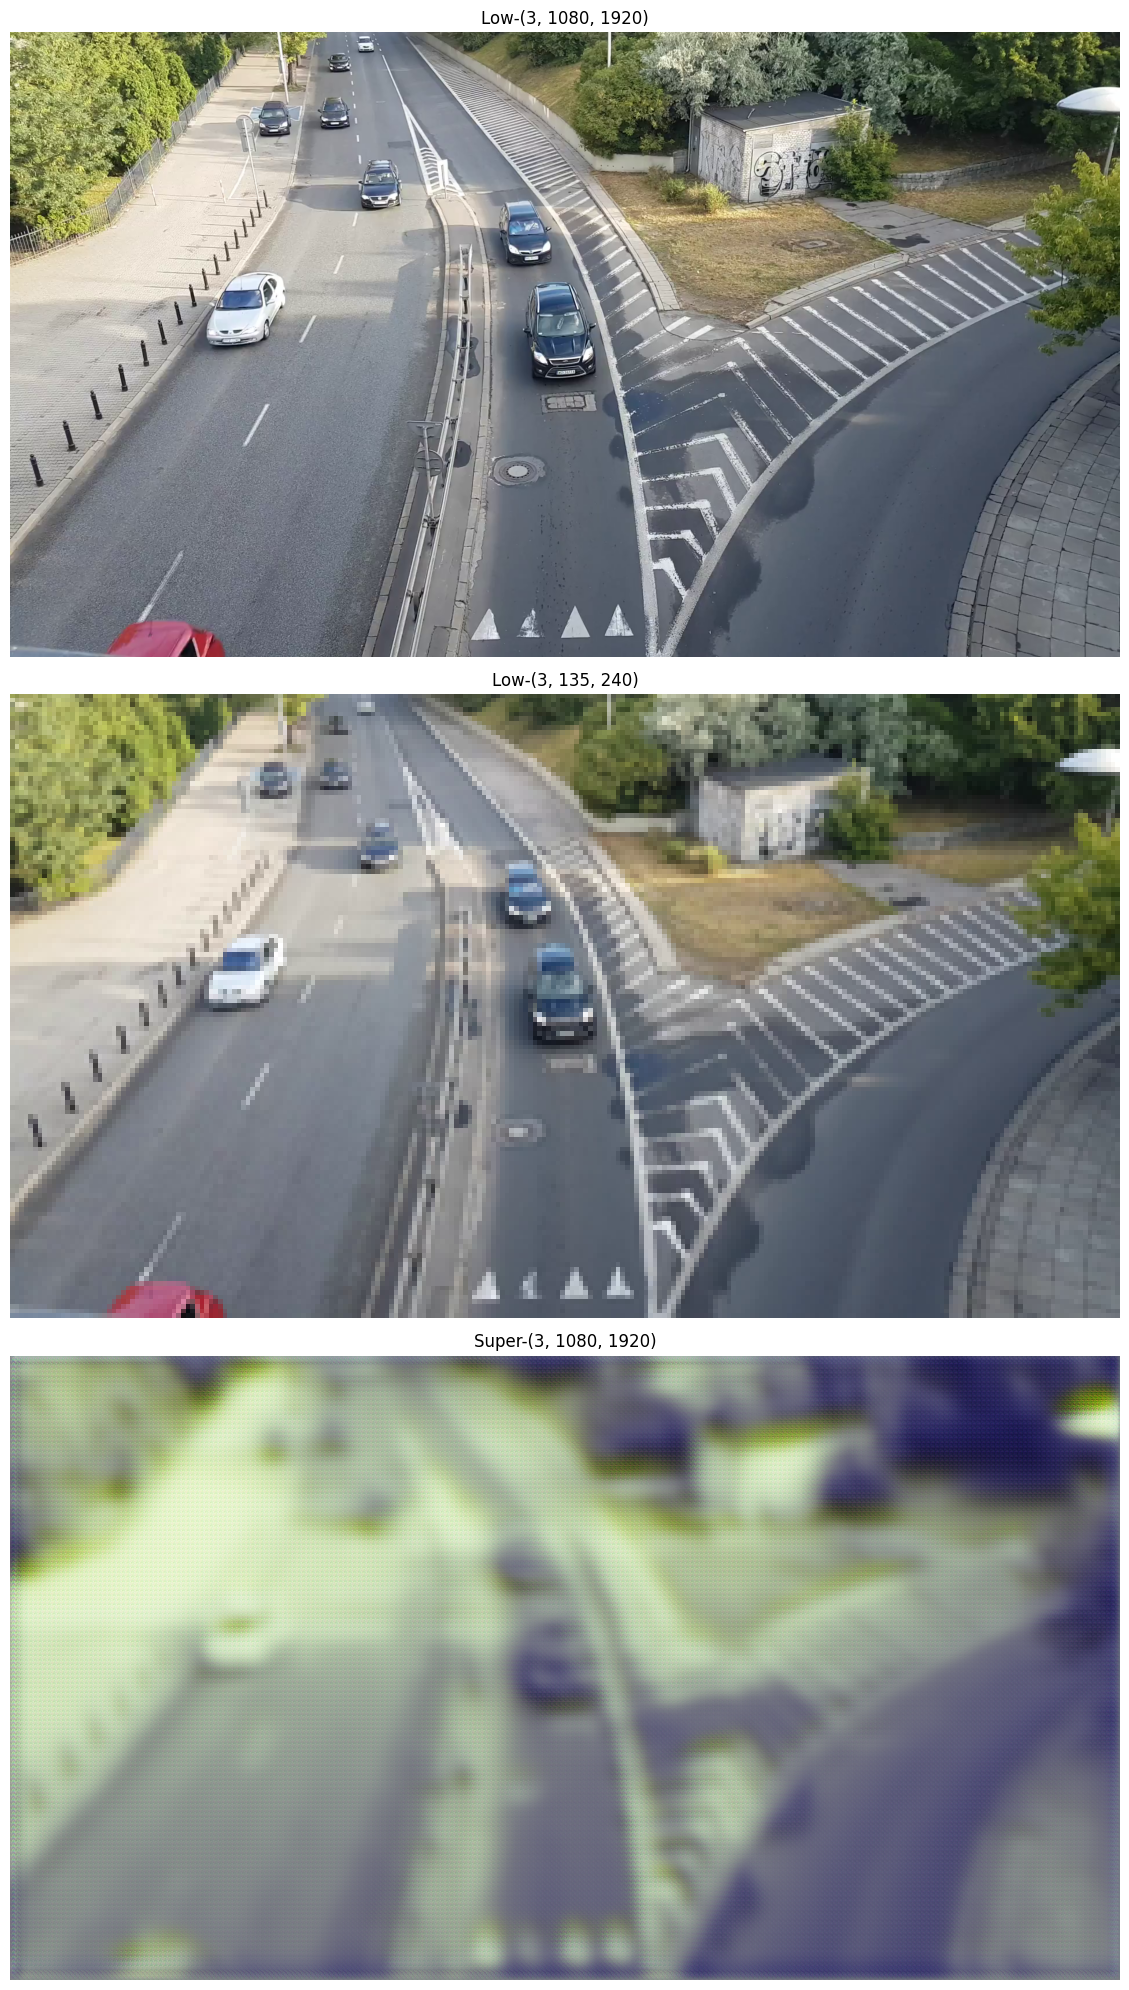

In [40]:
evaluate_model(the_model,the_test_image,the_history,UPSCALE_FACTOR)

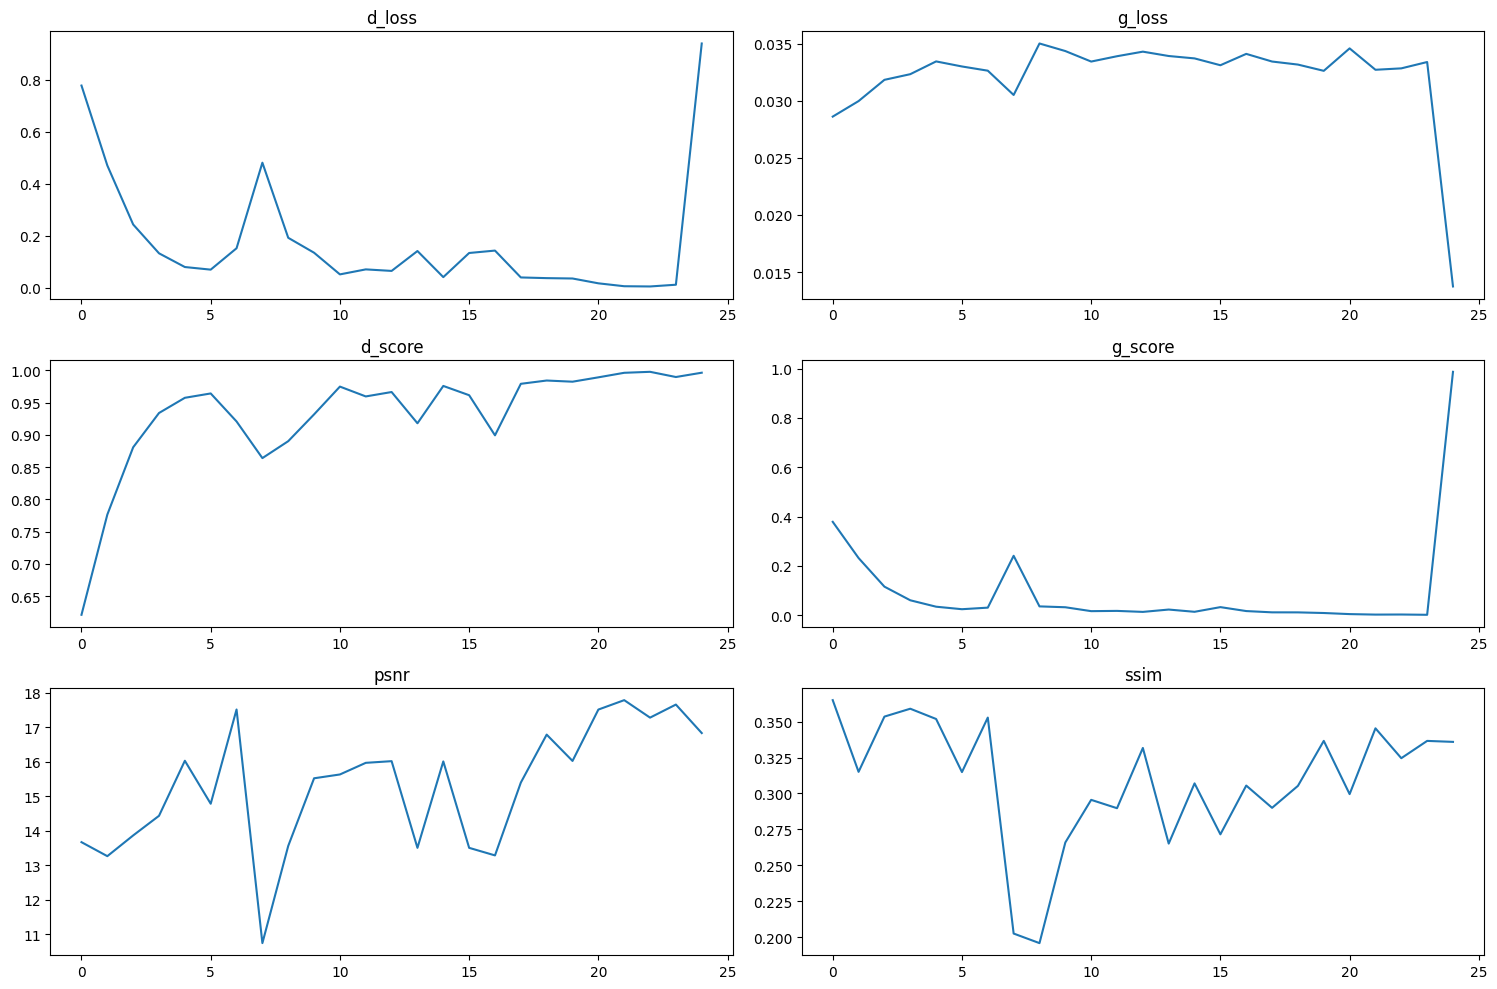

In [41]:
plot_metrics(EXP['RESULTS'])

## END